In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings

warnings.filterwarnings('ignore')

In [2]:
end_date = datetime.date.today()
start_date = end_date - pd.Timedelta(days = 365 * 10)

In [3]:
def download_daily_data_for_pair(ticker_1, ticker_2, start_date, end_date):
    data_ticker_1 = yf.download(ticker_1, start=start_date, end=end_date, auto_adjust=True)['Close']
    data_ticker_2 = yf.download(ticker_2, start=start_date, end=end_date, auto_adjust=True)['Close']
    
    data = pd.concat([data_ticker_1, data_ticker_2], axis=1)
    data.columns = [ticker_1, ticker_2]
    
    df = data.copy()
    return data, df

In [4]:
def plot_pair(data, ticker_1, ticker_2):
    plt.figure(figsize=(12,8))
    plt.scatter(data[ticker_2], data[ticker_1], color='g')
    plt.xlabel(ticker_2)
    plt.ylabel(ticker_1)
    plt.show()

In [5]:
def cointegrated_or_not(data, ticker_1, ticker_2):
    model = sm.OLS(data[ticker_1], data[ticker_2])
    model = model.fit()
    
    hedge_ratio = model.params[0]
    
    data['spread'] = data[ticker_1] - hedge_ratio * data[ticker_2]
    plt.figure(figsize=(12,8))
    plt.title(f'{ticker_1}-{ticker_2}')
    data['spread'].plot(ylabel='Spread')
    plt.show()
    
    adf = adfuller(data['spread'], maxlag=1)
    
    t_stat_value = adf[0]
    critical_values = adf[4] 
    print('t-stat value is: ', t_stat_value)
    print('critical values are: ', critical_values)
    
    is_cointegrated = False
    for critical_value in critical_values:
        if(t_stat_value < critical_values[critical_value]):
            # print(critical_values[critical_value])
            confidence_interval = 100 - int(critical_value.split('%')[0])
            print(f'Pairs are cointegrated with {confidence_interval}% confidence')
            is_cointegrated = True
            break
    
    if(not is_cointegrated):
        print('Pairs are not cointegrated')

In [6]:
def check_cointegration(ticker_1, ticker_2):
    data_original, df = download_daily_data_for_pair(ticker_1, ticker_2, start_date, end_date)
    plot_pair(df, ticker_1, ticker_2)
    cointegrated_or_not(df, ticker_1, ticker_2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


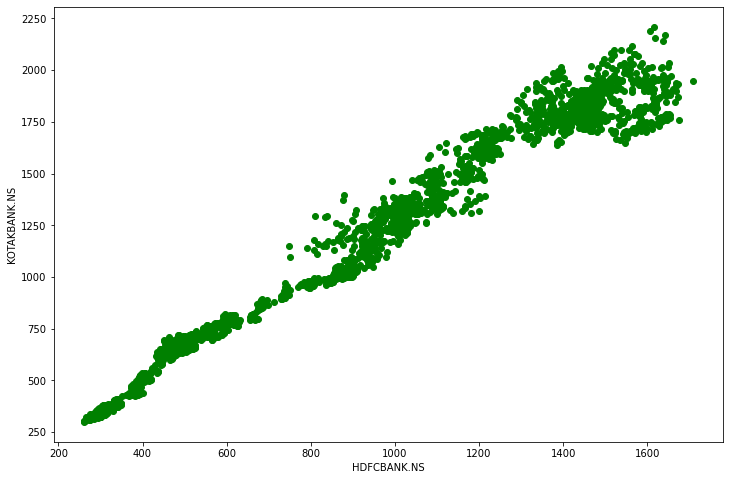

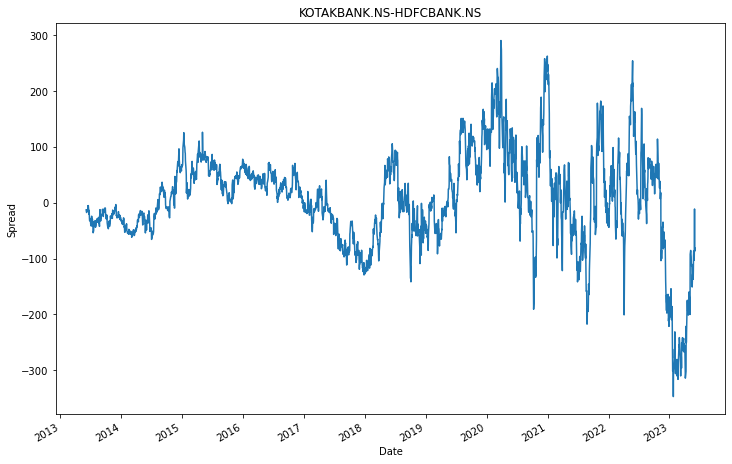

t-stat value is:  -5.225461053830707
critical values are:  {'1%': -3.4330088672375108, '5%': -2.8627146654531828, '10%': -2.5673953212600824}
Pairs are cointegrated with 99% confidence


In [7]:
ticker_1 = 'KOTAKBANK.NS'
ticker_2 = 'HDFCBANK.NS'
check_cointegration(ticker_1, ticker_2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


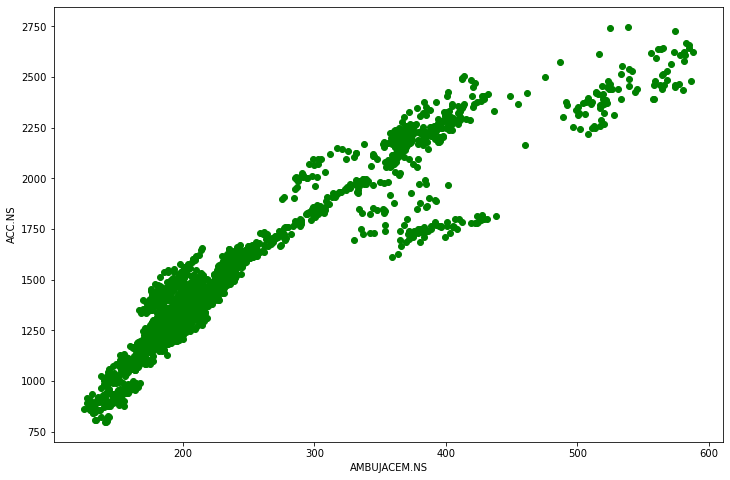

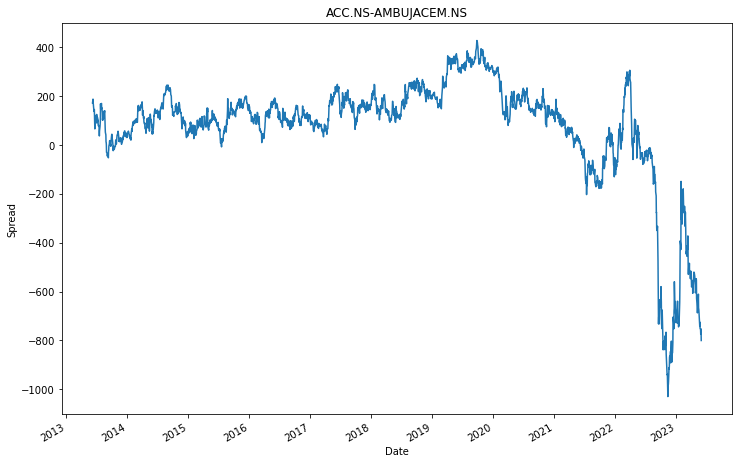

t-stat value is:  -0.34663864038473163
critical values are:  {'1%': -3.4330099487687264, '5%': -2.8627151430515654, '10%': -2.5673955755408095}
Pairs are not cointegrated


In [8]:
ticker_1 = 'ACC.NS'
ticker_2 = 'AMBUJACEM.NS'
check_cointegration(ticker_1, ticker_2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


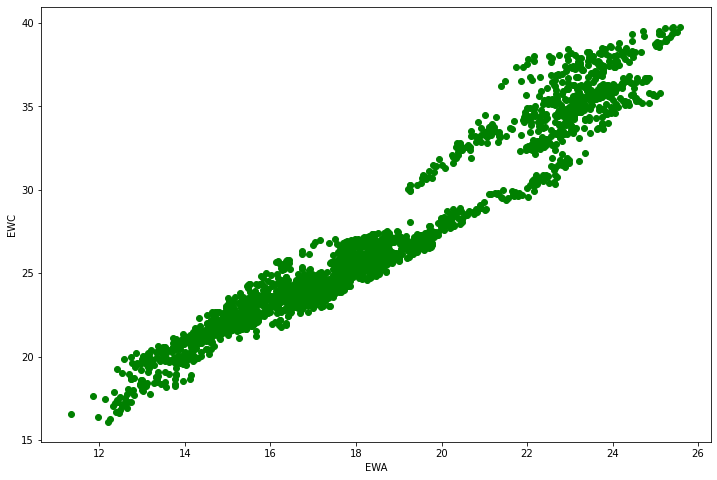

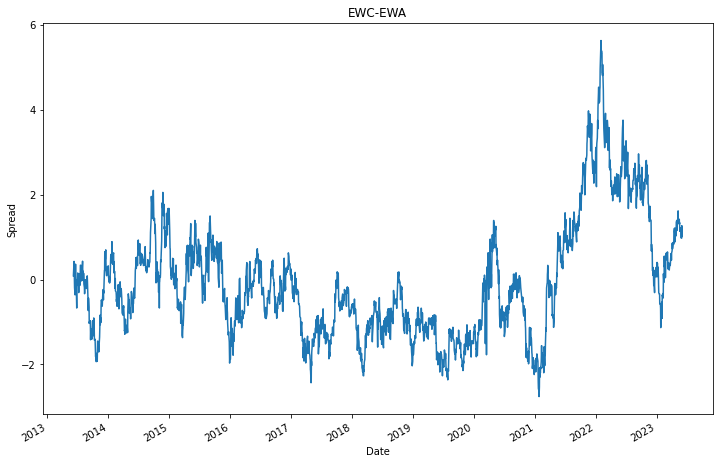

t-stat value is:  -3.2694188659991053
critical values are:  {'1%': -3.432954851668868, '5%': -2.862690812247962, '10%': -2.5673826214832887}
Pairs are cointegrated with 95% confidence


In [9]:
ticker_1 = 'EWC'
ticker_2 = 'EWA'
check_cointegration(ticker_1, ticker_2)

In [10]:
# from the spread of ACC & Ambuja Cements we can see that up until 2021 / 2022, the spread seems to be stationary

In [11]:
# checking for cointegration till 2020 for all the pairs
def check_cointegration_till_2020(ticker_1, ticker_2):
    data_original, df = download_daily_data_for_pair(ticker_1, ticker_2, start_date, end_date)
    plot_pair(df.loc[:'2020'], ticker_1, ticker_2)
    cointegrated_or_not(df.loc[:'2020'], ticker_1, ticker_2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


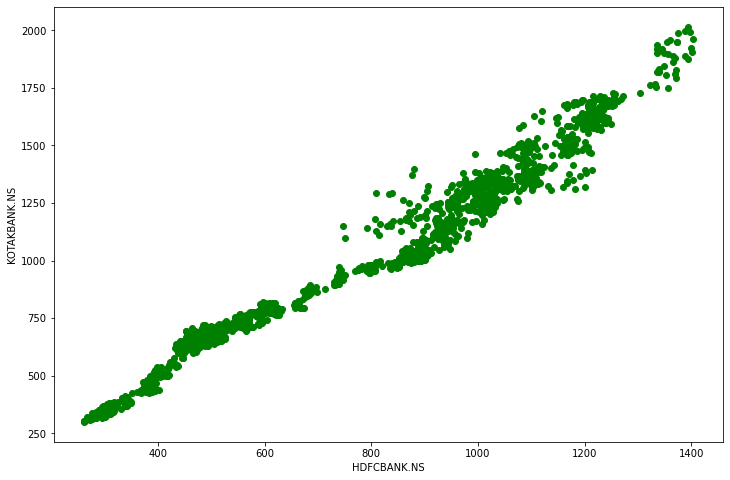

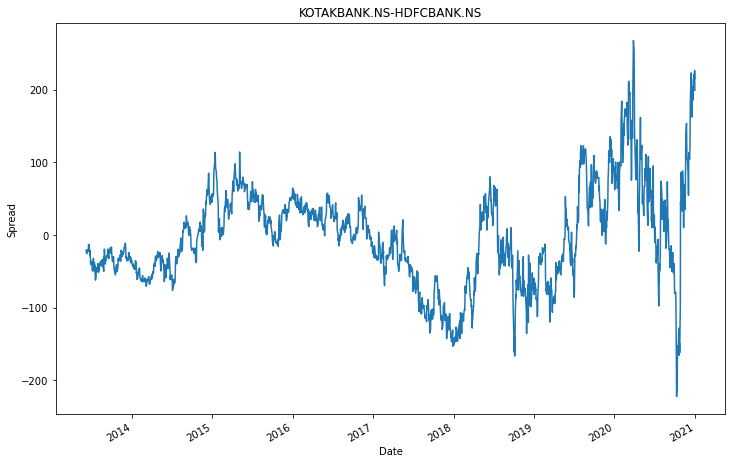

t-stat value is:  -4.440918700066766
critical values are:  {'1%': -3.433864939927475, '5%': -2.8630926485318433, '10%': -2.567596574226058}
Pairs are cointegrated with 99% confidence


In [12]:
ticker_1 = 'KOTAKBANK.NS'
ticker_2 = 'HDFCBANK.NS'
check_cointegration_till_2020(ticker_1, ticker_2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


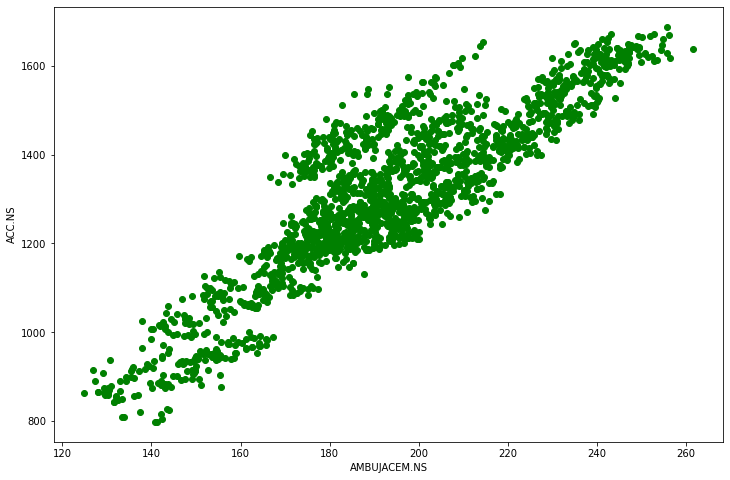

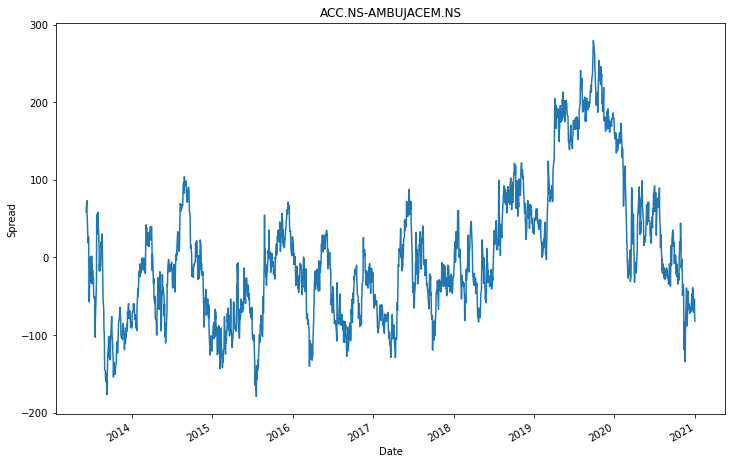

t-stat value is:  -3.5321793648386124
critical values are:  {'1%': -3.4338668302623336, '5%': -2.86309348305466, '10%': -2.5675970185783625}
Pairs are cointegrated with 99% confidence


In [13]:
ticker_1 = 'ACC.NS'
ticker_2 = 'AMBUJACEM.NS'
check_cointegration_till_2020(ticker_1, ticker_2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


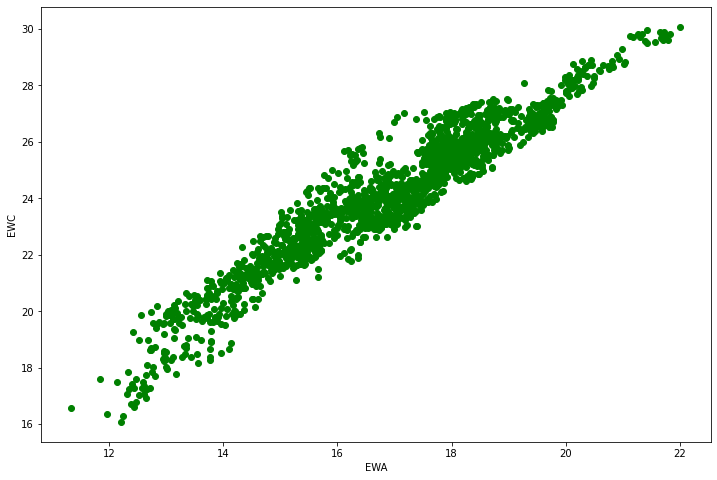

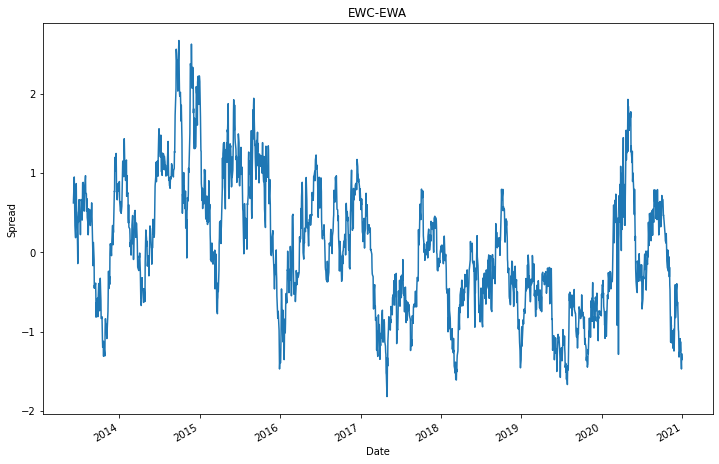

t-stat value is:  -4.478970060350585
critical values are:  {'1%': -3.433787340386774, '5%': -2.8630583903440656, '10%': -2.567578333092222}
Pairs are cointegrated with 99% confidence


In [14]:
ticker_1 = 'EWC'
ticker_2 = 'EWA'
check_cointegration_till_2020(ticker_1, ticker_2)

In [15]:
# So from the above, we can conclude that all 3 pairs are cointegrated with 99% confidence from start date till 2020.